In [ ]:
import csv
from getpass import getpass
from time import sleep 

from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchAttributeException
from selenium.webdriver import Chrome

In [ ]:
driver = Chrome()

In [ ]:
driver.get('https://twitter.com/login')

In [ ]:
username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('jamazichiheb')

In [ ]:
my_password = getpass()

In [ ]:
password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys('Seawaymn2011&&')

In [ ]:
password.send_keys(Keys.RETURN) #same action action as clicking login button

In [ ]:
search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')

In [ ]:
search_input.send_keys('#Epilepsy')

In [ ]:
search_input.send_keys(Keys.RETURN)

In [ ]:
driver.find_element_by_link_text('Latest').click()

In [ ]:
cards = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')

In [ ]:
card = cards[9]

In [ ]:
card.find_element_by_xpath('./div[2]/div[1]//span').text

In [ ]:
card.find_element_by_xpath('.//span[contains(text(), "@")]').text

In [ ]:
#content of the tweet 
comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
comment+responding

In [ ]:
def get_tweet_data(card):
    #extract data from tweet
    username = card.find_element_by_xpath('./div[2]/div[1]//span').text
    handle = card.find_element_by_xpath('.//span[contains(text(), "@")]').text
    try:
        postdate = card.find_element_by_xpath('.//time').get_attribute('datetime')
    except NoSuchAttributeException:
        return
    comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
    responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
    df = comment+responding
    tweet = (username, handle, df)
    return tweet

In [ ]:
get_tweet_data(card)

In [ ]:
tweet_data = []
for card in cards: 
    data=get_tweet_data(card)
    if data:
        tweet_data.append(data)

In [ ]:
tweet_data[5]

In [ ]:
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [ ]:
## Puting it all toghether

In [ ]:
import csv
from getpass import getpass
from time import sleep 
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchAttributeException
from selenium.webdriver import Chrome



def get_tweet_data(card):
    #extract data from tweet
    username = card.find_element_by_xpath('./div[2]/div[1]//span').text
    handle = card.find_element_by_xpath('.//span[contains(text(), "@")]').text
    try:
        postdate = card.find_element_by_xpath('.//time').get_attribute('datetime')
    except NoSuchAttributeException:
        return
    comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
    responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
    df = comment+responding
    tweet = (username, handle, df)
    return tweet

driver = Chrome()

driver.get('https://twitter.com/login')


##


In [ ]:
username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('jamazichiheb')


password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys("Seawaymn2011&&")
password.send_keys(Keys.RETURN)



In [ ]:
search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')
search_input.send_keys('#epilepsywarrior')
search_input.send_keys(Keys.RETURN)

driver.find_element_by_link_text('Latest').click()

data = []
tweet_ids = set()
last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True
while scrolling:
    page_cards = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')
    for card in page_cards[-15:]: 
        tweet= get_tweet_data(card)
        if tweet:
            tweet_id = ''.join(tweet)
            if tweet_id not in tweet_ids:
                tweet_ids.add(tweet_id)
                data.append(tweet)
    
    scroll_attempt = 0 
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(1)
        curr_position = driver.execute_script("return window.pageYOffset;")
        if last_position == curr_position:
            scroll_attempt += 1
            if scroll_attempt >= 3:
                scrolling = False
                break
            else:
                sleep(2)
        else:
            last_position = curr_position
            break

In [ ]:
len(data)

In [ ]:
with open('epiplsy_tweets.csv', 'w' ,newline='', encoding='utf-8') as f:
    header=['Username','Handle','Text']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

In [1]:
import pandas as pd
df = pd.read_csv('epiplsy_tweets.csv')

In [2]:
df.shape

(1164, 3)

In [3]:
df.head(10)

,Username,Handle,Text
0,My Epilepsy Journey,@EpilepsyMy,“Failure doesn’t come from falling down. Failu...
1,My Epilepsy Journey,@EpilepsyMy,“You can have results or excuses. Not both.” #...
2,Epilepsy Reach,@EpilepsyReach,A study published last year claims that listen...
3,The Chelsea Hutchison Foundation,@ChelseasLegacy,Happy St Patricks Day! May the luck of the Ir...
4,Grey/Bruce Epilepsy Awareness,@GBepilepsy,Day 17 of #march26daysofepilepsy for #epilepsy...
5,Emma IS,@EmmaIS_ca,Amazing messages from these Gr 1's!! We can't ...
6,Epilert,@epilert_inc,Why should epilepsy patients have a monitoring...
7,Ava Rose,@AvaRose82149357,#epilepsyawareness #epilepsywarrior #advocate ...
8,Epilepsy Southwestern Ontario,@EpilepsySWO,"Our Board Member, Katelynn Thibert, shares why..."
9,Dr. Dinesh Chouksey,@NeurologistInd,Epilepsy and Seizures\n\nWould you know what t...


In [4]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
df.drop(['Username', 'Handle'], axis=1,inplace = True)

In [6]:
# clean the text
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#remved @mentions
    text= re.sub(r'#', '', text) #removig hashtags
    text= re.sub(r'@', '', text)
    text = re.sub(r'RT[\s]+', '',text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper links
    return text

df['Text'] = df['Text'].apply(cleantext)
df

,Text
0,“Failure doesn’t come from falling down. Failu...
1,“You can have results or excuses. Not both.” m...
2,A study published last year claims that listen...
3,Happy St Patricks Day! May the luck of the Ir...
4,Day 17 of march26daysofepilepsy for epilepsyaw...
...,...
1159,When you travel to Colorado with your BFF to c...
1160,Camp drop off \n thank you epilepsyfoundation_...
1161,Birthday special on the Fin comps! fundraising...
1162,Let’s all wish epilepsywarrior \n_neuroninja\n...


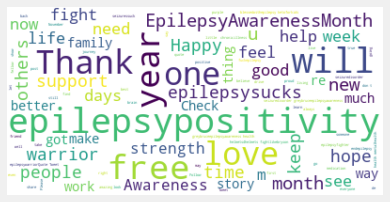

In [7]:
#plot the word cloud 
stopwords = set(STOPWORDS)
stopwords.update(["epilepsy", "epilepsyawareness", "epilepsywarrior","Replying",".","know","seizures","day","today","seizure","s"])
allwords = ' '.join([twts for twts in df['Text']])
wordcloud = WordCloud(stopwords=stopwords,max_font_size=100, max_words=100, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("first_review.png")


In [8]:
#create a funtion to get the subjectivity 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new clumns
df['Subjectivity'] = df ['Text'].apply(getSubjectivity)
df['Polarity'] = df ['Text'].apply(getPolarity)
df

,Text,Subjectivity,Polarity
0,“Failure doesn’t come from falling down. Failu...,0.348148,0.118519
1,“You can have results or excuses. Not both.” m...,0.400000,0.500000
2,A study published last year claims that listen...,0.173737,0.024621
3,Happy St Patricks Day! May the luck of the Ir...,0.711111,0.433333
4,Day 17 of march26daysofepilepsy for epilepsyaw...,0.333333,0.250000
...,...,...,...
1159,When you travel to Colorado with your BFF to c...,0.333333,0.312500
1160,Camp drop off \n thank you epilepsyfoundation_...,0.900000,0.900000
1161,Birthday special on the Fin comps! fundraising...,0.571429,0.446429
1162,Let’s all wish epilepsywarrior \n_neuroninja\n...,0.579630,0.345833


In [9]:
#create a function to compute the negative , neutral and posiive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(10)

,Text,Subjectivity,Polarity,Analysis
0,“Failure doesn’t come from falling down. Failu...,0.348148,0.118519,Positive
1,“You can have results or excuses. Not both.” m...,0.400000,0.500000,Positive
2,A study published last year claims that listen...,0.173737,0.024621,Positive
3,Happy St Patricks Day! May the luck of the Ir...,0.711111,0.433333,Positive
4,Day 17 of march26daysofepilepsy for epilepsyaw...,0.333333,0.250000,Positive
5,Amazing messages from these Gr 1's!! We can't ...,0.700000,0.468750,Positive
6,Why should epilepsy patients have a monitoring...,0.700000,0.562500,Positive
7,epilepsyawareness epilepsywarrior advocate adv...,0.616667,0.270833,Positive
8,"Our Board Member, Katelynn Thibert, shares why...",0.000000,0.000000,Neutral
9,Epilepsy and Seizures\n\nWould you know what t...,0.000000,-0.050000,Negative


In [10]:
df["Analysis"].value_counts()

Positive    646
Neutral     266
Negative    252
Name: Analysis, dtype: int64

<AxesSubplot:xlabel='Analysis', ylabel='count'>

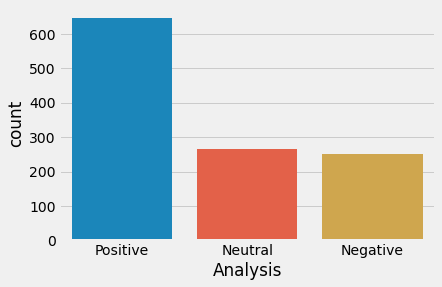

In [11]:
import seaborn as sns
sns.countplot(x=df["Analysis"])

Text(0, 0.5, 'Subjectivity')

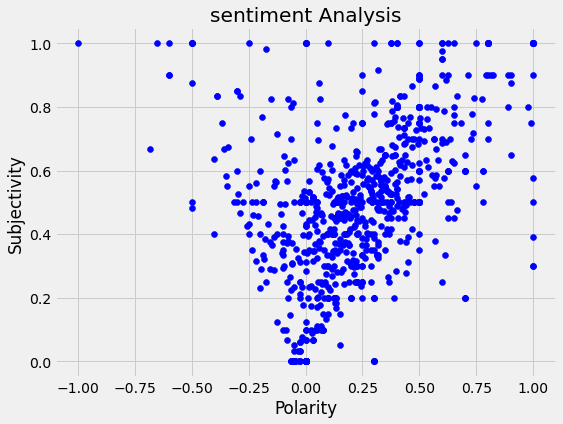

In [12]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color ='Blue')
    
plt.title('sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [8]:
#tokenizer 
#etant donné une phrase, la diviser en caractères ou en mots s’appelle la tokénisation. 
#Il existe des bibliothèques, telles que spaCy, qui offrent des solutions complexes à la Tokenization
# Construction 1

from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

In [9]:
data = df['Text']
doc = nlp.pipe(data)
tokens = [[token.text for token in tokens] for tokens in doc]
print(tokens)

[['“', 'Failure', 'does', 'n’t', 'come', 'from', 'falling', 'down', '.', 'Failure', 'comes', 'from', 'not', 'getting', 'up', '.', '”', 'motivation', 'happiness', 'warrior', 'positivity', 'confidence', 'drive', 'success', 'inspirational', 'epilepsywarrior', 'epilepsypositivity', 'PositiveVibesOnly', 'positivemindset', 'results', 'rise', 'strength', 'strengthwithin'], ['“', 'You', 'can', 'have', 'results', 'or', 'excuses', '.', 'Not', 'both', '.', '”', 'motivation', 'happiness', 'warrior', 'positivity', 'confidence', 'drive', 'success', 'inspirational', 'epilepsywarrior', 'epilepsypositivity', 'PositiveVibesOnly', 'positivemindset', 'results', 'rise', 'strength', 'strengthwithin'], ['A', 'study', 'published', 'last', 'year', 'claims', 'that', 'listening', 'to', 'Mozart', 'may', 'reduce', 'the', 'frequency', 'of', 'seizures', 'in', 'patients', 'with', 'epilepsy', '!', '\n\n', 'epilepsyreach', 'epilepsyreachfoundation', 'epilepsyawareness', 'epilepsy', 'epilepsystrong', 'epilepsywarriorMoz

In [15]:
#suprimer les mots les plus frequent
from spacy.lang.en.stop_words import STOP_WORDS
print('Number of stop words: %d' % len(STOP_WORDS))
print('First ten stop words: %s' % list(STOP_WORDS)[:20])

Number of stop words: 326
First ten stop words: ['thru', 'sometimes', 'per', 'except', 'even', 'due', 'someone', 'whence', 'whereas', 'rather', 'somewhere', 'towards', 'thereupon', 'must', 'either', 'seems', 'however', 'mine', 'serious', 'and']


In [12]:
#supprimer les mots vides
doc = nlp.pipe(data)
tokens = [[token for token in tokens  if not token.is_stop  ] for tokens in doc]
print('Original text: %s' % (data))
print('text sans mots vides: %s' % (tokens))

Original text: 0       “Failure doesn’t come from falling down. Failu...
1       “You can have results or excuses. Not both.” m...
2       A study published last year claims that listen...
3       Happy St Patricks Day!  May the luck of the Ir...
4       Day 17 of march26daysofepilepsy for epilepsyaw...
                              ...                        
1159    When you travel to Colorado with your BFF to c...
1160    Camp drop off \n thank you epilepsyfoundation_...
1161    Birthday special on the Fin comps! fundraising...
1162    Let’s all wish epilepsywarrior \n_neuroninja\n...
1163    A weekend of nothing  the caravan, other than ...
Name: Text, Length: 1164, dtype: object
text sans mots vides: [[“, Failure, come, falling, ., Failure, comes, getting, ., ”, motivation, happiness, warrior, positivity, confidence, drive, success, inspirational, epilepsywarrior, epilepsypositivity, PositiveVibesOnly, positivemindset, results, rise, strength, strengthwithin], [“, results, excuses

In [23]:
#convertir tout le texte en minuscules
doc = nlp.pipe(data)
tokens = [[token.text.lower() for token in tokens] for tokens in doc]
print(tokens)

[['“', 'failure', 'does', 'n’t', 'come', 'from', 'falling', 'down', '.', 'failure', 'comes', 'from', 'not', 'getting', 'up', '.', '”', 'motivation', 'happiness', 'warrior', 'positivity', 'confidence', 'drive', 'success', 'inspirational', 'epilepsywarrior', 'epilepsypositivity', 'positivevibesonly', 'positivemindset', 'results', 'rise', 'strength', 'strengthwithin'], ['“', 'you', 'can', 'have', 'results', 'or', 'excuses', '.', 'not', 'both', '.', '”', 'motivation', 'happiness', 'warrior', 'positivity', 'confidence', 'drive', 'success', 'inspirational', 'epilepsywarrior', 'epilepsypositivity', 'positivevibesonly', 'positivemindset', 'results', 'rise', 'strength', 'strengthwithin'], ['a', 'study', 'published', 'last', 'year', 'claims', 'that', 'listening', 'to', 'mozart', 'may', 'reduce', 'the', 'frequency', 'of', 'seizures', 'in', 'patients', 'with', 'epilepsy', '!', '\n\n', 'epilepsyreach', 'epilepsyreachfoundation', 'epilepsyawareness', 'epilepsy', 'epilepsystrong', 'epilepsywarriormoz

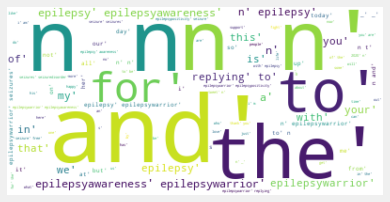

In [21]:
allwords = ''.join(str(e) for e in tokens)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
temp = df.apply(lambda x: True if x['Analysis'] == 'Positive' else False , axis=1)
num_Positive = len(temp[temp == True].index) 
print('number of postive ',num_Positive)

temp2 = df.apply(lambda x: True if x['Analysis'] == 'Negative' else False , axis=1)
num_Negative = len(temp2[temp2 == True].index) 
print('number of Negative ',num_Negative)

temp3 = df.apply(lambda x: True if x['Analysis'] == 'Neutral' else False , axis=1)
num_Neutral = len(temp3[temp3 == True].index) 
print('number of Neutral ',num_Neutral)